# Convolutional Neural Network

This notebook contains tests of the CNN architecture. Results will later be copied to the main Jupyter Notebook in the root folder of the Project 1.

In [2]:
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

data_path = os.path.abspath('../data/cinic-10_image_classification_challenge-dataset/train')

seed_value = 2024

train_ds, test_ds = keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="both",
    seed=seed_value,
    image_size=(32, 32),
    batch_size=16
)

class_names = train_ds.class_names
print(f'Classes: {class_names}')
input_shape = (32, 32, 3)
n_classes = len(class_names)


Found 90000 files belonging to 10 classes.
Using 72000 files for training.
Using 18000 files for validation.
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Test 1: Single convolutional layer
Conv2D - MaxPooling2D - (Flatten) Dense (1024) - Dense (10)

In [2]:
name = 'cnn1'
n_epochs = 10
optimizer = 'adamax'
loss = 'sparse_categorical_crossentropy'

keras.utils.set_random_seed(seed_value)

i = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.Model(i, x)

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=n_epochs
)
model.save('train_history/' + name + '.keras')
history_df = pd.DataFrame(history.history) 
hist_csv_file = 'train_history/' + name + '_history.csv'
with open(hist_csv_file, mode='w') as f:
    history_df.to_csv(f)

Epoch 1/10
4500/4500 [==============================] - 71s 16ms/step - loss: 6.4905 - accuracy: 0.3372 - val_loss: 1.6416 - val_accuracy: 0.4189
Epoch 2/10
4500/4500 [==============================] - 71s 16ms/step - loss: 1.4456 - accuracy: 0.4834 - val_loss: 1.5213 - val_accuracy: 0.4750
Epoch 3/10
4500/4500 [==============================] - 70s 15ms/step - loss: 1.0444 - accuracy: 0.6358 - val_loss: 1.7651 - val_accuracy: 0.4587
Epoch 4/10
4500/4500 [==============================] - 70s 16ms/step - loss: 0.6368 - accuracy: 0.7865 - val_loss: 2.0941 - val_accuracy: 0.4643
Epoch 5/10
4500/4500 [==============================] - 71s 16ms/step - loss: 0.3380 - accuracy: 0.8930 - val_loss: 2.6015 - val_accuracy: 0.4595
Epoch 6/10
4500/4500 [==============================] - 70s 16ms/step - loss: 0.1876 - accuracy: 0.9448 - val_loss: 2.9295 - val_accuracy: 0.4746
Epoch 7/10
4500/4500 [==============================] - 71s 16ms/step - loss: 0.1203 - accuracy: 0.9662 - val_loss: 3.2806 -

In [8]:
def plot_accuracy_and_loss(history_df, name):
    # Plot and save accuraccy
    plt.plot(history_df['accuracy'])
    plt.plot(history_df['val_accuracy'])
    plt.title('CNN 1: accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(f'train_history/{name}_accuracy.png')
    # Plot and save loss
    plt.figure()
    plt.plot(history_df['loss'])
    plt.plot(history_df['val_loss'])
    plt.title('CNN 1: loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.savefig(f'train_history/{name}_loss.png')

name = 'cnn1'
history_df = pd.read_csv('train_history/'+name+'_history.csv', sep=',')
history_df
plot_accuracy_and_loss(history_df, name)

In [9]:
def plot_confusion_matrix(name):
    model = keras.models.load_model('train_history/'+name+'.keras')
    images, labels = tuple(zip(*test_ds.unbatch()))
    X_test = np.array(images)
    y_test = np.array(labels)
    y_pred = np.argmax(model.predict(X_test), axis=-1)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(0, 10), yticklabels=range(0, 10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix. Accuracy: {accuracy * 100:.2f}%')
    plt.savefig('train_history/cnn1_confusion_matrix.png')

plot_confusion_matrix('cnn1')

## Test 2: Single convolutional layer with normalization

Conv2D - (Batch normalization) MaxPooling2D - (Flatten) Dense (1024) - Dense (10)

563/563 [==============================] - 2s 4ms/step
Accuracy: 52.15%


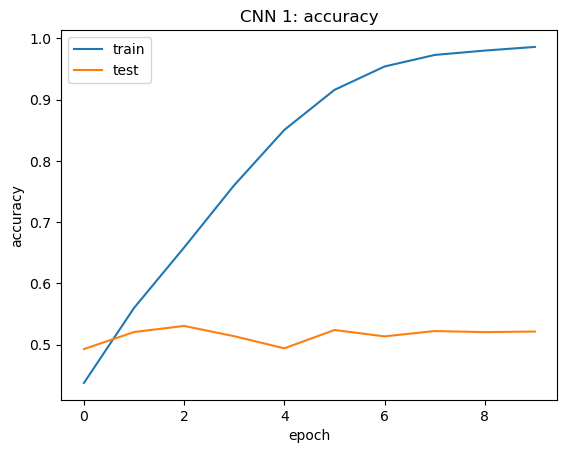

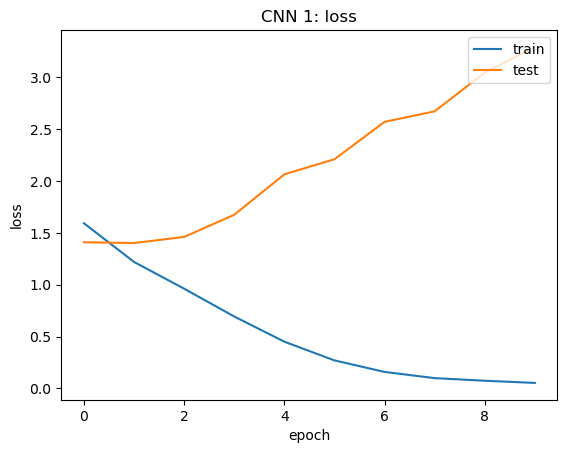

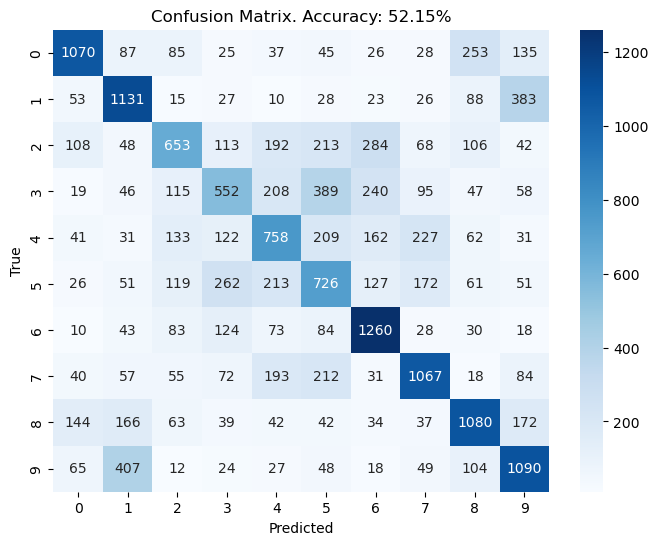

In [10]:
name = 'cnn2'
n_epochs = 10
optimizer = 'adamax'
loss = 'sparse_categorical_crossentropy'

keras.utils.set_random_seed(seed_value)

i = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.Model(i, x)

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=n_epochs
)
model.save('train_history/' + name + '.keras')
history_df = pd.DataFrame(history.history) 
hist_csv_file = 'train_history/' + name + '_history.csv'
with open(hist_csv_file, mode='w') as f:
    history_df.to_csv(f)

history_df = pd.read_csv('train_history/'+name+'_history.csv', sep=',')
plot_accuracy_and_loss(history_df, name)
plot_confusion_matrix(name)